In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np

In [2]:
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')

train_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,154,03.06.2011,2.0,0,6,0,5,1,1,24.8000,0.587133,53.12505,0.253121,991,0,898,4414,5312
1,685,15.11.2012,4.0,1,11,0,4,1,2,12.8667,0.324492,93.06255,0.152987,601,0,320,5125,5445
2,368,03.01.2012,1.0,1,1,0,2,1,1,6.0000,0.126275,66.18750,0.365671,549,0,89,2147,2236
3,472,16.04.2012,2.0,1,4,1,1,0,1,26.5667,0.614925,84.25005,0.284829,740,0,1198,5172,6370
4,442,17.03.2012,1.0,1,3,0,-1,0,2,20.5667,0.505046,113.37495,0.110704,773,1,3155,4681,7836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,78,19.03.2011,1.0,0,3,0,6,0,1,18.9000,0.466525,56.87505,0.368167,1022,1,1424,1693,3117
596,81,22.03.2011,NaN,0,3,0,2,1,1,17.6667,0.440642,93.68745,0.225750,551,0,460,2243,2703
597,377,12.01.2012,1.0,1,1,0,4,1,2,15.3000,0.381938,120.43755,0.180967,520,0,269,3828,4097
598,299,26.10.2011,4.0,0,10,0,3,1,2,19.3667,0.472846,108.06255,0.148642,605,0,404,3490,3894


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          600 non-null    int64  
 1   dteday           600 non-null    object 
 2   season           538 non-null    float64
 3   yr               600 non-null    int64  
 4   mnth             600 non-null    int64  
 5   holiday          600 non-null    int64  
 6   weekday          600 non-null    int64  
 7   workingday       600 non-null    int64  
 8   weathersit       600 non-null    int64  
 9   temp             600 non-null    float64
 10  atemp            600 non-null    float64
 11  hum              566 non-null    float64
 12  windspeed        600 non-null    float64
 13  leaflets         600 non-null    int64  
 14  price reduction  600 non-null    int64  
 15  casual           600 non-null    int64  
 16  registered       600 non-null    int64  
 17  cnt             

In [3]:
from sklearn.impute import SimpleImputer

imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')


handled_season = imp_most_freq.fit_transform(train_df['season'].to_numpy().reshape(-1, 1))

handled_season


train_df['season'] = handled_season

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

handled_hum = imp_median.fit_transform(train_df['hum'].to_numpy().reshape(-1, 1))

train_df['hum'] = handled_hum 

In [4]:
train_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,154,03.06.2011,2.0,0,6,0,5,1,1,24.8000,0.587133,53.12505,0.253121,991,0,898,4414,5312
1,685,15.11.2012,4.0,1,11,0,4,1,2,12.8667,0.324492,93.06255,0.152987,601,0,320,5125,5445
2,368,03.01.2012,1.0,1,1,0,2,1,1,6.0000,0.126275,66.18750,0.365671,549,0,89,2147,2236
3,472,16.04.2012,2.0,1,4,1,1,0,1,26.5667,0.614925,84.25005,0.284829,740,0,1198,5172,6370
4,442,17.03.2012,1.0,1,3,0,-1,0,2,20.5667,0.505046,113.37495,0.110704,773,1,3155,4681,7836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,78,19.03.2011,1.0,0,3,0,6,0,1,18.9000,0.466525,56.87505,0.368167,1022,1,1424,1693,3117
596,81,22.03.2011,1.0,0,3,0,2,1,1,17.6667,0.440642,93.68745,0.225750,551,0,460,2243,2703
597,377,12.01.2012,1.0,1,1,0,4,1,2,15.3000,0.381938,120.43755,0.180967,520,0,269,3828,4097
598,299,26.10.2011,4.0,0,10,0,3,1,2,19.3667,0.472846,108.06255,0.148642,605,0,404,3490,3894


In [6]:
train_df['weekday']

0      5
1      4
2      2
3      1
4     -1
      ..
595    6
596    2
597    4
598    3
599    5
Name: weekday, Length: 600, dtype: int64

In [17]:
train_df['weekday'] = pd.to_datetime(train_df['dteday'], format="%d.%M.%Y").dt.dayofweek

train_df['weekday']

0      0
1      6
2      1
3      0
4      1
      ..
595    2
596    5
597    3
598    2
599    2
Name: weekday, Length: 600, dtype: int32

In [24]:
train_df.sort_values('instant')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
90,1,01.01.2011,NaN,0,1,0,5,0,2,13.7667,0.363625,120.87495,0.160446,755,0,331,654,985
303,2,02.01.2011,1.0,0,1,0,6,0,2,14.5391,0.353739,104.41305,0.248539,837,1,131,670,801
213,3,03.01.2011,NaN,0,1,0,0,1,1,7.8546,0.189405,65.59095,0.248309,829,0,120,1229,1349
29,4,04.01.2011,1.0,0,1,0,1,1,1,8.0000,0.212122,88.56525,0.160296,734,0,108,1454,1562
361,5,05.01.2011,1.0,0,1,0,2,1,1,9.0783,0.229270,65.54355,0.186900,745,0,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,726,26.12.2012,1.0,1,12,0,3,1,3,9.7333,0.220333,123.49995,0.316546,701,0,9,432,441
363,727,27.12.2012,1.0,1,12,0,4,1,2,10.1667,0.226642,97.93755,0.350133,561,0,247,1867,2114
299,728,28.12.2012,1.0,1,12,0,5,1,2,10.1333,0.255046,88.50000,0.155471,562,0,644,2451,3095
573,729,29.12.2012,1.0,1,12,0,6,0,2,10.1333,0.242400,112.93755,0.124383,783,0,159,1182,1341


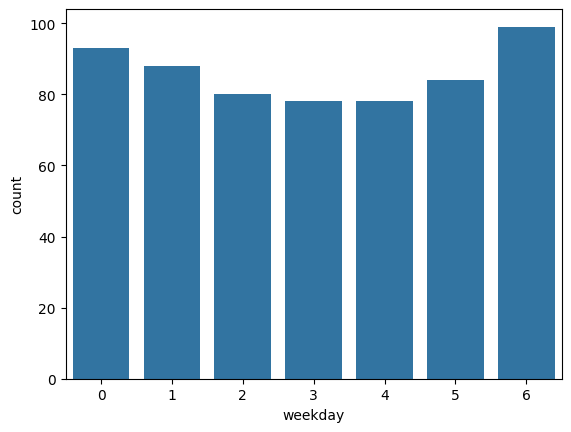

In [20]:
sns.countplot(x='weekday', data=train_df)
plt.show()


In [4]:
train_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
count,600.000000,538.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,566.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,363.116667,2.436803,0.496667,6.475000,0.03000,2.928333,0.680000,1.401667,19.808284,0.473620,93.845200,0.183696,740.065000,0.150000,1070.895000,3634.116667,4705.011667
std,208.711917,1.107240,0.500406,3.442741,0.17073,2.079360,0.466865,0.542360,7.206843,0.160439,21.380635,0.125257,164.430095,0.357369,2971.316154,1538.698254,3588.750428
min,1.000000,1.000000,0.000000,1.000000,0.00000,-1.000000,0.000000,1.000000,2.365200,0.079070,28.187550,-1.000000,459.000000,0.000000,2.000000,20.000000,22.000000
25%,181.250000,1.000000,0.000000,4.000000,0.00000,1.000000,0.000000,1.000000,13.575000,0.338256,77.328150,0.134335,600.750000,0.000000,313.000000,2499.000000,3135.000000
50%,362.500000,2.000000,0.000000,6.000000,0.00000,3.000000,1.000000,1.000000,20.100000,0.489690,93.256800,0.180971,737.000000,0.000000,722.000000,3657.000000,4530.000000
75%,538.250000,3.000000,1.000000,9.000000,0.00000,5.000000,1.000000,2.000000,26.058300,0.605127,109.921913,0.233947,875.500000,0.000000,1078.000000,4680.250000,5909.500000
max,731.000000,4.000000,1.000000,12.000000,1.00000,6.000000,1.000000,3.000000,34.466700,0.826371,145.875000,0.507463,1032.000000,1.000000,47138.000000,6946.000000,53021.000000
